# Análisis de datos - Titanic

### Descripción: 
**TODO:** agregar un texto introductorio. Breve descripción de lo que se va a analizar

---

##### Librerías

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

#### Función grafo por categoría

In [ ]:
def validar_busqueda(apellido , data_a_validar):
    #Si está vacío, arrojará un excepción. 
    if data_a_validar.empty:
            raise ValueError(f"No se encontraron registros para el apellido {apellido} proporcionado")

def retornar_categoria_elegida(opcion):
    opciones_disponibles = {1:["Sex",["male", "female"]],
                            2:["Pclass",["1", "2", "3"]],
                            3:["Survived",["1", "0"]]}
    if opcion in opciones_disponibles.keys():
        return opciones_disponibles[opcion]
    raise ValueError(f"No se encontró la opción{opcion}, intente con un valor válido tales como: {opciones_disponibles.keys()}")
    
def generar_grafo_por_categoria(apellido, data, opcion):
    try:
        #Expresiones regulares para obtener el apellido de las columna Name.
        apellido = "^" + re.escape(apellido.capitalize()) + ".*"
        
        #Filtrar el DataFrame para incluir solo las filas que coinciden con el nombre dado
        data_filtrada = data[data['Name'].str.match(apellido)]

        #validar la busqueda
        validar_busqueda(apellido,data_filtrada)
        
        #Retorna la categoria a buscar y hace unpacking.
        categoria, valores_categoria = retornar_categoria_elegida(opcion)
        
        #Crear un grafo dirigido.
        DG = nx.DiGraph()
        
        #Agregar nodos y bordes al grafo.
        for i in range(0, len(data_filtrada)):
            DG.add_edge(data_filtrada.iloc[i]['Name'], data_filtrada.iloc[i][categoria])
        
        #Definir colores para los nodos
        color_nodos = ['red' if node in valores_categoria else 'lightblue' for node in DG.nodes()]
        
        #Dibujar grafo
        fig, ax = plt.subplots(figsize = (20,20))
        nx.draw(DG, with_labels=True, node_size = 1500,node_color= color_nodos)
        plt.show()
    
    except Exception as e:
        print(f"Error:{e}")

#### Función grafos por nombres

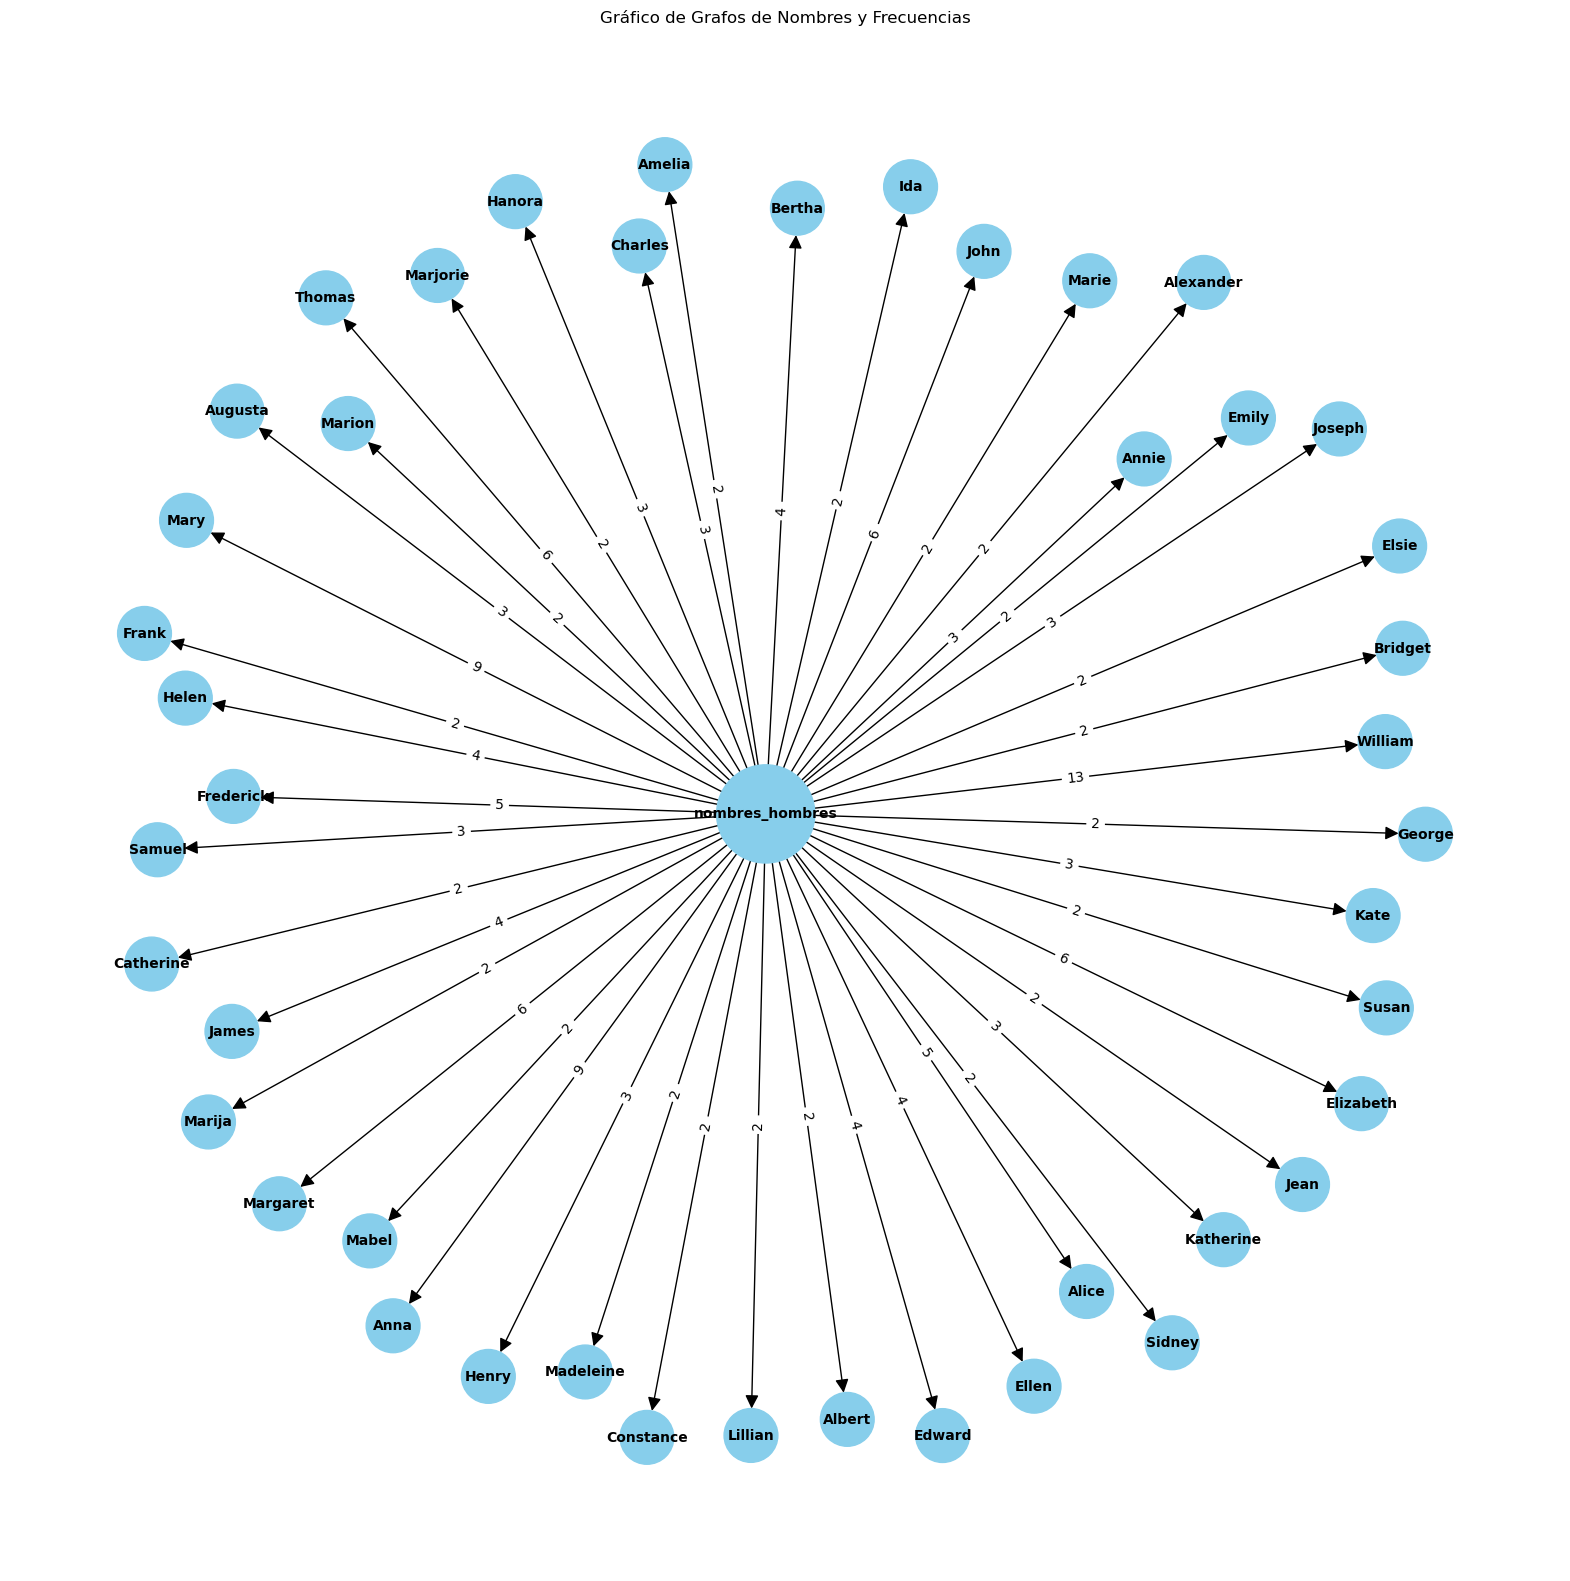

In [37]:
def generar_grafo_por_nombres(regex, data, sexo):
    # Filtrar los nombres de hombres utilizando la expresión regular y la columna "Sex"
    nombres_hombres = data[data['Sex'] == sexo]['Name'].str.extract(regex, expand=False)

    nombres_hombres_repetidos = pd.DataFrame(nombres_hombres.value_counts())
    nombres_hombres_repetidos = nombres_hombres_repetidos.reset_index()
    nombres_hombres_repetidos.columns = ['Nombre', 'Cantidad']
    
    # Crear un gráfico dirigido utilizando NetworkX
    G = nx.DiGraph()

    # Agregar el nodo central
    nombres_hombres = 'nombres_hombres'
    G.add_node(nombres_hombres)

    # Agregar los nodos de nombres y las aristas
    for _, row in nombres_hombres_repetidos[nombres_hombres_repetidos["Cantidad"]>=2].iterrows():
        nombre = row['Nombre']
        cantidad = row['Cantidad']
        G.add_node(nombre)
        G.add_edge(nombres_hombres, nombre, weight=cantidad)

    # Crear un diccionario de tamaños de nodos
    node_sizes = {node: 5000 if node == nombres_hombres else 1500 for node in G.nodes()}

    # Dibujar grafo
    fig, ax = plt.subplots(figsize = (20,20))
    pos = nx.spring_layout(G, seed=42)  # Posición de los nodos para una mejor visualización
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=[node_sizes[node] for node in G.nodes()], 
            node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Gráfico de Grafos de Nombres y Frecuencias")
    plt.show()
    
    
expresion_regular = r',\s[^\s]+ (\w+)'
data = pd.read_csv('Titanic.csv')

generar_grafo_por_nombres(expresion_regular, data, "male")
